In [1]:
import os
import numpy as np
import zipfile
from urllib import request
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import keras
%matplotlib inline

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization,Input

depth = 10
filters = 64
model = Sequential()
#Adding layers

model.add(Conv2D(filters ,kernel_size=(3,3), activation='relu',padding = 'same', input_shape = (256,150,1)))

for i in range(depth-2):
    model.add(Conv2D(filters, kernel_size=(3,3), activation='relu',padding = 'same'))
    model.add(BatchNormalization())
    
model.add(Conv2D(1, kernel_size=(3,3), padding = 'same'))
model.summary()

W0212 10:41:11.176836  2380 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0212 10:41:11.224436  2380 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0212 10:41:11.235405  2380 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0212 10:41:11.300400  2380 deprecation_wrapper.py:119] From C:\Users\devendra\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instea

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 150, 64)      640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 150, 64)      256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 256, 150, 64)      36928     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256, 150, 64)      256       
__________

In [21]:
import nibabel as nib
import matplotlib.pyplot as plt
img = nib.load('')
epi = img.get_fdata()
slice_A = epi[200,:,:]
fig, ax = plt.subplots()
ax.imshow(slice_A, cmap="gray")
plt.show()

FileNotFoundError: No such file or no access: 'IXI015-HH-1258-IXIMADisoTFE12_-s3T115_-0301-00003-000001-01.nii'

In [4]:
import random
import numpy as np
def add_rician_noise_to_img(noise_percent,img):
    random_factor = noise_percent * np.random.normal(loc=0., scale=1., size=img.shape)
    noise_image_real = img + random_factor
    noise_image_img = random_factor
    noise_image_real = np.square(noise_image_real) 
    noise_image_img = np.square(noise_image_img) 
    rician_noise_square =  noise_image_img + noise_image_real
    rician_noise_image = np.sqrt(rician_noise_square)
    return rician_noise_image

In [5]:
slice_A_with_noise = add_rician_noise_to_img(0.2,slice_A)
slice_A_with_noise.dtype

dtype('float64')

In [6]:
slice_A_with_noise

array([[0.08024879, 0.02872921, 0.10690946, ..., 0.39845281, 0.1938209 ,
        0.34548237],
       [0.07195722, 0.00800898, 0.38731309, ..., 0.34688363, 0.20730237,
        3.22537352],
       [0.25950284, 0.08909548, 0.18549522, ..., 6.60047618, 0.19389409,
        0.13003869],
       ...,
       [0.03681234, 0.17092929, 0.56233495, ..., 0.27016749, 0.47149032,
        0.1884766 ],
       [0.2408748 , 0.15178011, 0.48616536, ..., 0.36231718, 0.30815763,
        0.01311593],
       [0.36592467, 0.09672303, 0.17019326, ..., 0.24254969, 0.37063307,
        0.03030903]])

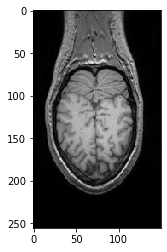

In [7]:
fig, ax = plt.subplots()
ax.imshow(slice_A_with_noise, cmap="gray")
plt.show()

In [8]:
residual_noise = slice_A_with_noise - slice_A

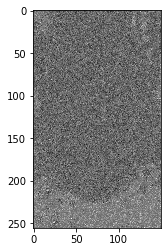

In [9]:
fig, ax = plt.subplots()
ax.imshow(residual_noise, cmap="gray")
plt.show()

In [3]:
import keras.backend as K
def average_mean_squared_error(y_true,y_pred):
    return K.sum(K.square(y_pred-y_true))/1006

In [4]:
import os
os.chdir('D:/beproj/dataset/nusta_noise')

In [5]:
import numpy as np
import glob
Y_train = np.zeros((581,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("D:/beproj/dataset/nusta_noise/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.shape == (256,150):
        Y_train[i] = b
        i = i + 1

In [6]:
i

503

In [7]:
Y_train = Y_train[:503,:,:]

In [8]:
Y_train.shape

(503, 256, 150)

In [9]:
import os
os.chdir('D:/beproj/dataset/image_with_noise/')

In [10]:
import numpy as np
import glob
X_train = np.zeros((581,256,150), dtype=np.float64)
count = 0
txt_files = glob.glob("D:/beproj/dataset/image_with_noise/*.nii")
i = 0
for f_name in txt_files:
    b = np.loadtxt(f_name ,delimiter=',')
    if b.shape == (256,150):
        X_train[i] = b
        i = i + 1

In [11]:
i

503

In [12]:
X_train = X_train[:503,:,:]
X_train.shape

(503, 256, 150)

In [13]:
X_train.shape[1:]

(256, 150)

In [ ]:
import keras.backend as K

def noise_accuracy(y_true, y_pred):
    return K.mean(y_pred)

In [19]:
from keras import optimizers
opt = optimizers.SGD(lr=0.0001, momentum=0.8, clipnorm=1.0)
model.compile(optimizer = opt, loss= average_mean_squared_error, metrics=["accuracy"])

In [20]:
model.fit(X_train[:30,:,:].reshape(-1,256,150,1),Y_train[:30,:,:].reshape(-1,256,150,1),epochs=50 ,batch_size=10)

Epoch 1/50
30/30 [==============================] - 3s 99ms/step - loss: 16.6710 - acc: 0.0000e+00
Epoch 2/50
30/30 [==============================] - 2s 62ms/step - loss: 16.6529 - acc: 0.0000e+00
Epoch 3/50
30/30 [==============================] - 2s 62ms/step - loss: 16.6288 - acc: 0.0000e+00
Epoch 4/50
30/30 [==============================] - 2s 62ms/step - loss: 16.6311 - acc: 0.0000e+00
Epoch 5/50
30/30 [==============================] - 2s 62ms/step - loss: 16.6746 - acc: 0.0000e+00
Epoch 6/50
30/30 [==============================] - 2s 62ms/step - loss: 16.7316 - acc: 0.0000e+00
Epoch 7/50
30/30 [==============================] - 2s 62ms/step - loss: 16.7725 - acc: 0.0000e+00
Epoch 8/50
10/30 [=========>....................] - ETA: 1s - loss: 16.6818 - acc: 0.0000e+00

KeyboardInterrupt: 

In [14]:
resi = model.predict(np.array(slice_A_with_noise).reshape(-1,256,150,1))
resi.shape

(1, 256, 150, 1)